
# Crypto News (GDELT normalized) — Quick Examine Notebook

This notebook **uses the helper functions from** `fin_rl.data.io.news_io` to explore your
normalized GDELT news dataset (under `normalized_unique/`).

What it does:
- Call module helpers:
  - `summarize_articles(articles.parquet)`
  - `summarize_rel(article_token_map.parquet)`
  - `summarize_per_symbol(per_symbol_unique.parquet)` *(if present)*
  - `print_samples_by_token(...)`
- Then some quick extra explorations (no resampling, just groupby):
  - Daily article counts (overall)
  - Daily article counts per symbol (subset)
  - Top domains / languages overview

> Assumes you have already installed your repo as a package (e.g. `pip install -e .`)
> so that `fin_rl` can be imported without manual `sys.path` edits.


In [4]:

# ==== CONFIG ====
NEWS_DIR = "../../work/data/gdelt_0024_hardfix_split/normalized_unique"  # change if needed
SAMPLES_PER_TOKEN = 3
# Optional subset to plot per-symbol daily counts. Leave empty to auto-pick top 4.
PLOT_SYMBOLS = ["BTC", "ETH", "BNB", "SOL"]
SAVE_PLOTS = True
OUT_DIR = "./_out_news"


In [5]:

# ==== IMPORTS ====
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fin_rl.data.io import news_io as nio
from importlib import reload
reload(nio)

print("Loaded helpers from:", nio.__file__)


Loaded helpers from: /home/kylh/phd/tw_fin_rl/fin_rl/data/io/news_io.py


## 1) Load + Summaries via module helpers

In [6]:

from pathlib import Path
news_dir = Path(NEWS_DIR)

# 1) Articles (unique URLs)
articles_df = nio.summarize_articles(news_dir / "articles.parquet")

# 2) Article <-> Token map
rel_df, all_symbols = nio.summarize_rel(news_dir / "article_token_map.parquet")

# 3) Per-symbol unique (if exists)
per_symbol_path = news_dir / "per_symbol_unique.parquet"
if per_symbol_path.exists():
    per_symbol_df = nio.summarize_per_symbol(per_symbol_path)
else:
    per_symbol_df = None

# 4) Print token samples
nio.print_samples_by_token(articles_df, all_symbols, n=SAMPLES_PER_TOKEN)


+----------------------------------------------------------------+
|                     ARTICLES (unique URLs)                     |
+--------+---------------------------+---------------------------+
|  Rows  |           Start           |            End            |
+--------+---------------------------+---------------------------+
| 134992 | 2020-08-11 00:15:00+00:00 | 2025-09-03 23:30:00+00:00 |
+--------+---------------------------+---------------------------+
+-----------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                Sample articles                                                                |
+-----------------------------------------------------------------+---------+---------------------------+---------------------------+-----------+
|                            url_canon                            |  tokens |       first_see

## 2) Quick Peeks (dataframes)

In [7]:

print("\n=== articles_df.head() ===")
display(articles_df.head())

print("\n=== rel_df.head() ===")
display(rel_df.head())

if per_symbol_df is not None:
    print("\n=== per_symbol_df.head() ===")
    display(per_symbol_df.head())



=== articles_df.head() ===


,url_canon,url,title,title_norm,domain,language,sourcecountry,socialimage,seendate,date,day,tokens,all_days,languages,sourcecountries,first_seen_any,last_seen_any,n_records,main_symbol
0,http://7thspace.com/trends/678762/bitcoin_news...,http://7thspace.com/trends/678762/bitcoin_news...,Bitcoin news is a trending topic,bitcoin news is a trending topic,7thspace.com,English,Hong Kong,,2021-01-11 20:00:00+00:00,2021-01-11,2021-01-11,[BTC],[2021-01-11],[English],[Hong Kong],2021-01-11 20:00:00+00:00,2021-01-11 20:00:00+00:00,1,BTC
1,http://7thspace.com/trends/697273/ethereum_pri...,http://7thspace.com/trends/697273/ethereum_pri...,Ethereum price is a trending topic,ethereum price is a trending topic,7thspace.com,English,Hong Kong,,2021-02-09 16:30:00+00:00,2021-02-09,2021-02-09,[ETH],[2021-02-09],[English],[Hong Kong],2021-02-09 16:30:00+00:00,2021-02-09 16:30:00+00:00,1,ETH
2,http://923wnpc.com/bitcoin-scam-in-cocke-county/,http://923wnpc.com/bitcoin-scam-in-cocke-county/,Bitcoin Scam In Cocke County – 92 . 3 WNPC,bitcoin scam in cocke county 92 3 wnpc,923wnpc.com,English,United States,,2024-07-01 19:30:00+00:00,2024-07-01,2024-07-01,[BTC],[2024-07-01],[English],[United States],2024-07-01 19:30:00+00:00,2024-07-01 19:30:00+00:00,1,BTC
3,http://abstvradio.com/eccb-cautions-public-on-...,http://abstvradio.com/eccb-cautions-public-on-...,ECCB CAUTIONS PUBLIC ON USE OF BITCOIN,eccb cautions public on use of bitcoin,abstvradio.com,English,Antigua and Barbuda,http://abstvradio.com/wp-content/uploads/2021/...,2021-04-29 17:15:00+00:00,2021-04-29,2021-04-29,[BTC],[2021-04-29],[English],[Antigua and Barbuda],2021-04-29 17:15:00+00:00,2021-04-29 17:15:00+00:00,1,BTC
4,http://africa.chinadaily.com.cn/a/202101/05/WS...,http://africa.chinadaily.com.cn/a/202101/05/WS...,Bitcoin price falls back after surge,bitcoin price falls back after surge,africa.chinadaily.com.cn,English,China,http://img2.chinadaily.com.cn/images/202101/05...,2021-01-05 03:15:00+00:00,2021-01-05,2021-01-05,[ETH],[2021-01-05],[English],[China],2021-01-05 03:15:00+00:00,2021-01-05 03:15:00+00:00,1,ETH



=== rel_df.head() ===


,url_canon,symbol_req,first_seen,last_seen,n_hits,days_list
0,http://7thspace.com/trends/678762/bitcoin_news...,BTC,2021-01-11 20:00:00+00:00,2021-01-11 20:00:00+00:00,1,[2021-01-11]
1,http://7thspace.com/trends/697273/ethereum_pri...,ETH,2021-02-09 16:30:00+00:00,2021-02-09 16:30:00+00:00,1,[2021-02-09]
2,http://923wnpc.com/bitcoin-scam-in-cocke-county/,BTC,2024-07-01 19:30:00+00:00,2024-07-01 19:30:00+00:00,1,[2024-07-01]
3,http://abstvradio.com/eccb-cautions-public-on-...,BTC,2021-04-29 17:15:00+00:00,2021-04-29 17:15:00+00:00,1,[2021-04-29]
4,http://africa.chinadaily.com.cn/a/202101/05/WS...,ETH,2021-01-05 03:15:00+00:00,2021-01-05 03:15:00+00:00,1,[2021-01-05]



=== per_symbol_df.head() ===


,url_canon,symbol_req,first_seen,last_seen,n_hits
0,http://7thspace.com/trends/678762/bitcoin_news...,BTC,2021-01-11 20:00:00+00:00,2021-01-11 20:00:00+00:00,1
1,http://7thspace.com/trends/697273/ethereum_pri...,ETH,2021-02-09 16:30:00+00:00,2021-02-09 16:30:00+00:00,1
2,http://923wnpc.com/bitcoin-scam-in-cocke-county/,BTC,2024-07-01 19:30:00+00:00,2024-07-01 19:30:00+00:00,1
3,http://abstvradio.com/eccb-cautions-public-on-...,BTC,2021-04-29 17:15:00+00:00,2021-04-29 17:15:00+00:00,1
4,http://africa.chinadaily.com.cn/a/202101/05/WS...,ETH,2021-01-05 03:15:00+00:00,2021-01-05 03:15:00+00:00,1


## 3) Basic Quality/Info Checks

In [9]:
import pandas as pd
import numpy as np

def _choose_key_cols(df):
    """Chọn bộ cột khóa hợp lý để check duplicates, tránh cột list/ndarray."""
    if {"url_canon", "symbol_req"}.issubset(df.columns):
        return ["url_canon", "symbol_req"]
    if "url_canon" in df.columns:
        return ["url_canon"]
    # Không có khóa rõ ràng -> fallback: convert list/ndarray -> tuple (chậm hơn)
    return None

def _safe_dup_count(df):
    key_cols = _choose_key_cols(df)
    if key_cols is not None:
        return int(df.duplicated(subset=key_cols).sum())
    # Fallback: chuyển mọi list/ndarray/dict/set sang dạng hashable
    conv = df.copy()
    for c in conv.columns:
        if conv[c].dtype == "object":
            conv[c] = conv[c].apply(
                lambda x: tuple(x) if isinstance(x, (list, np.ndarray))
                else (tuple(sorted(x)) if isinstance(x, set)
                else (tuple(sorted(x.items())) if isinstance(x, dict) else x))
            )
    return int(conv.duplicated().sum())

def print_df_overview(name, df):
    print(f"\n== {name} | shape={df.shape} ==")
    print("dtypes:")
    print(df.dtypes)

    # Range thời gian nếu có các cột datetime
    for col in ["first_seen_any", "last_seen_any", "first_seen", "last_seen", "seendate"]:
        if col in df.columns and pd.api.types.is_datetime64_any_dtype(df[col]):
            print(f"  {col}: [{df[col].min()} .. {df[col].max()}]")

    # Duplicates an toàn
    n_dups = _safe_dup_count(df)
    key_cols = _choose_key_cols(df)
    if key_cols is None:
        print(f"duplicates (fallback, full row after conversion): {n_dups}")
    else:
        print(f"duplicates (by {key_cols}): {n_dups}")

    # NA cells
    n_na = int(df.isna().sum().sum())
    print("NA cells:", n_na)

# Gọi lại:
print_df_overview("articles_df", articles_df)
print_df_overview("rel_df", rel_df)
if per_symbol_df is not None:
    print_df_overview("per_symbol_df", per_symbol_df)



== articles_df | shape=(134992, 19) ==
dtypes:
url_canon                       object
url                             object
title                           object
title_norm                      object
domain                          object
language                        object
sourcecountry                   object
socialimage                     object
seendate           datetime64[ns, UTC]
date                            object
day                             object
tokens                          object
all_days                        object
languages                       object
sourcecountries                 object
first_seen_any     datetime64[ns, UTC]
last_seen_any      datetime64[ns, UTC]
n_records                        int64
main_symbol                     object
dtype: object
  first_seen_any: [2020-08-11 00:15:00+00:00 .. 2025-09-03 23:30:00+00:00]
  last_seen_any: [2020-08-11 00:15:00+00:00 .. 2025-09-03 23:30:00+00:00]
  seendate: [2020-08-11 00:15:00+00:00 .. 2025-0

duplicates (by ['url_canon', 'symbol_req']): 0
NA cells: 0


## 4) Daily Counts (overall and by symbol)

In [10]:

# Overall daily counts from articles_df (based on first_seen_any)
if "first_seen_any" in articles_df.columns:
    adf = articles_df.copy()
    adf["day"] = pd.to_datetime(adf["first_seen_any"], utc=True).dt.date
    daily_all = adf.groupby("day").size().rename("n_articles").to_frame()
else:
    daily_all = pd.DataFrame()

# Per-symbol daily counts from rel_df (based on first_seen)
if {"symbol_req", "first_seen"}.issubset(rel_df.columns):
    rdf = rel_df.copy()
    rdf["day"] = pd.to_datetime(rdf["first_seen"], utc=True).dt.date
    daily_sym = rdf.groupby(["day", "symbol_req"]).size().rename("n_articles").reset_index()
else:
    daily_sym = pd.DataFrame()

display(daily_all.head())
display(daily_sym.head())


,n_articles
day,
2020-08-11,55
2020-08-12,60
2020-08-13,59
2020-08-14,62
2020-08-15,31


,day,symbol_req,n_articles
0,2020-08-11,BTC,51
1,2020-08-11,ETH,4
2,2020-08-12,BTC,56
3,2020-08-12,ETH,4
4,2020-08-13,BTC,46


### 4.a) Plot — Overall daily article counts

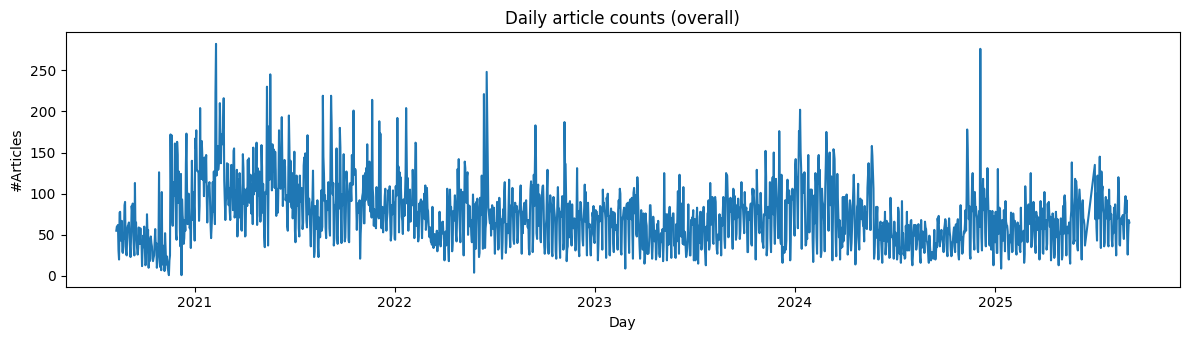

In [11]:

if not daily_all.empty:
    s = daily_all["n_articles"]
    plt.figure(figsize=(12, 3.5))
    plt.plot(s.index, s.values)
    plt.title("Daily article counts (overall)")
    plt.xlabel("Day")
    plt.ylabel("#Articles")
    plt.tight_layout()
    if SAVE_PLOTS:
        os.makedirs(OUT_DIR, exist_ok=True)
        plt.savefig(os.path.join(OUT_DIR, "daily_articles_overall.png"), dpi=150)
    plt.show()


### 4.b) Plot — Daily article counts by symbol (subset)

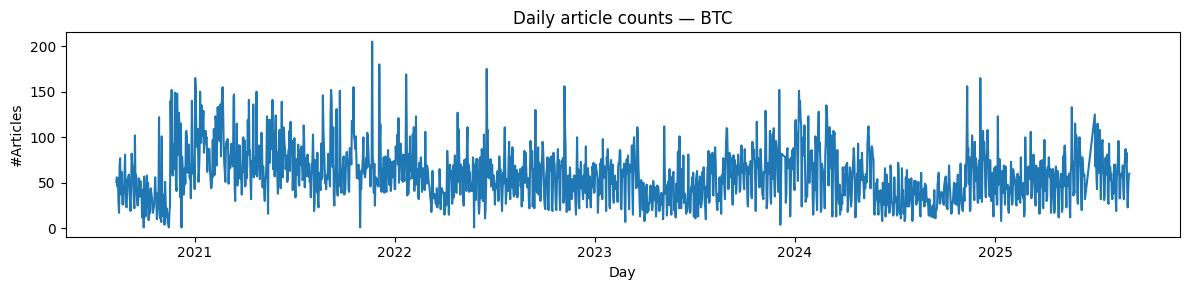

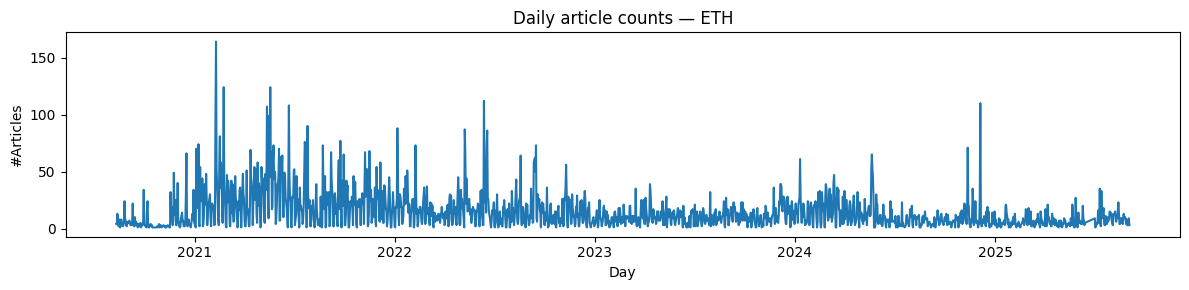

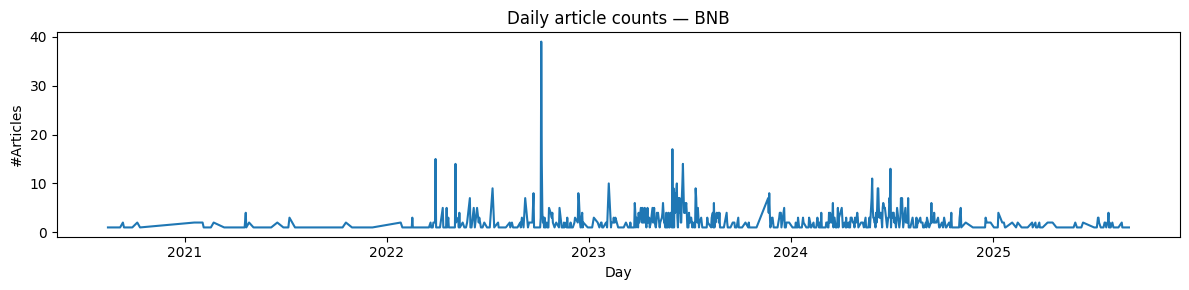

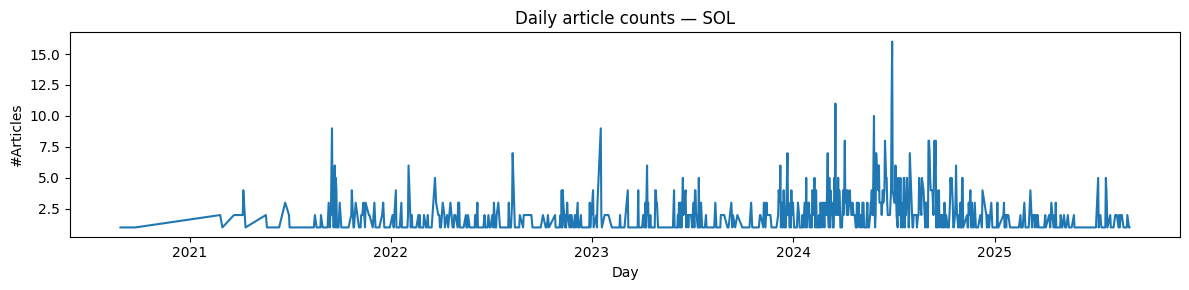

In [12]:

if not daily_sym.empty:
    # Choose symbols to plot
    if not PLOT_SYMBOLS:
        top = (
            daily_sym.groupby("symbol_req")["n_articles"].sum()
            .sort_values(ascending=False)
            .head(4).index.tolist()
        )
    else:
        top = PLOT_SYMBOLS

    for sym in top:
        sub = daily_sym[daily_sym["symbol_req"] == sym]
        if sub.empty:
            continue
        s = sub.set_index("day")["n_articles"].sort_index()
        plt.figure(figsize=(12, 3))
        plt.plot(s.index, s.values)
        plt.title(f"Daily article counts — {sym}")
        plt.xlabel("Day")
        plt.ylabel("#Articles")
        plt.tight_layout()
        if SAVE_PLOTS:
            os.makedirs(OUT_DIR, exist_ok=True)
            plt.savefig(os.path.join(OUT_DIR, f"daily_articles_{sym}.png"), dpi=150)
        plt.show()


## 5) Top Domains / Languages

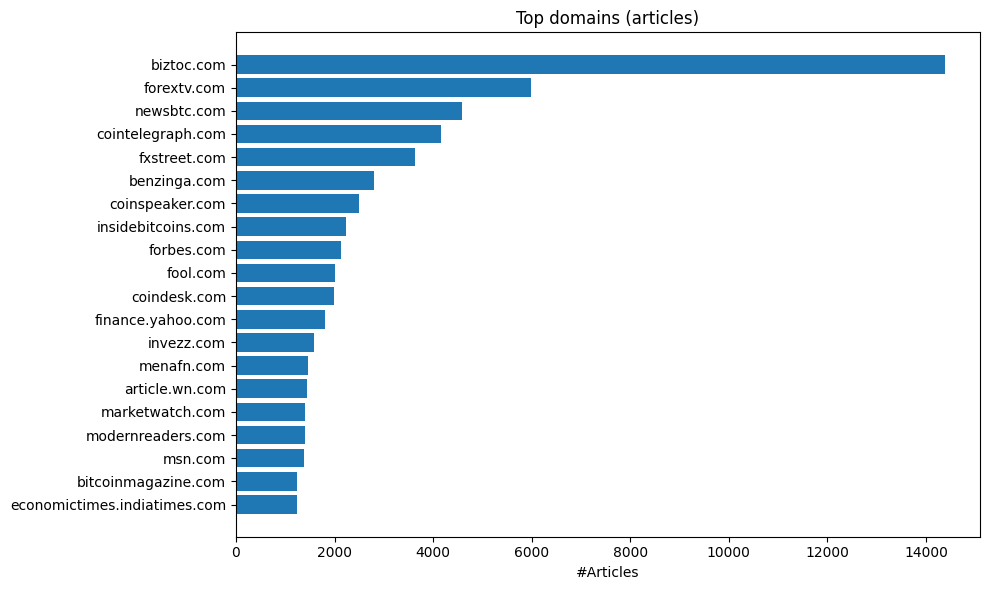

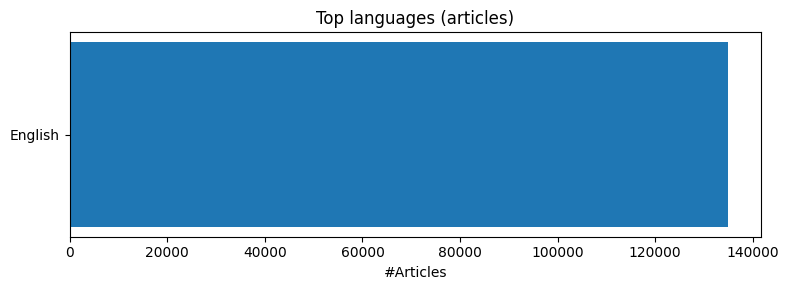

In [13]:

top_n = 20

# Top domains
if "domain" in articles_df.columns:
    dom = (
        articles_df["domain"].dropna().astype(str).str.strip().value_counts().head(top_n)
    )
    plt.figure(figsize=(10, max(3, 0.3*len(dom))))
    plt.barh(dom.index[::-1], dom.values[::-1])
    plt.title("Top domains (articles)")
    plt.xlabel("#Articles")
    plt.tight_layout()
    if SAVE_PLOTS:
        os.makedirs(OUT_DIR, exist_ok=True)
        plt.savefig(os.path.join(OUT_DIR, "top_domains.png"), dpi=150)
    plt.show()

# Languages
if "language" in articles_df.columns:
    lang = (
        articles_df["language"].dropna().astype(str).str.strip().value_counts().head(top_n)
    )
    plt.figure(figsize=(8, max(3, 0.3*len(lang))))
    plt.barh(lang.index[::-1], lang.values[::-1])
    plt.title("Top languages (articles)")
    plt.xlabel("#Articles")
    plt.tight_layout()
    if SAVE_PLOTS:
        os.makedirs(OUT_DIR, exist_ok=True)
        plt.savefig(os.path.join(OUT_DIR, "top_languages.png"), dpi=150)
    plt.show()


## 6) (Optional) Export compact CSVs

In [14]:

# Save daily count tables for quick comparison outside notebook
if not daily_all.empty:
    os.makedirs(OUT_DIR, exist_ok=True)
    daily_all.to_csv(os.path.join(OUT_DIR, "daily_articles_overall.csv"))
if not daily_sym.empty:
    os.makedirs(OUT_DIR, exist_ok=True)
    daily_sym.to_csv(os.path.join(OUT_DIR, "daily_articles_by_symbol.csv"), index=False)
print("Done.")


Done.
